### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from os import listdir

plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150
sns.set_theme()
%config InlineBackend.figure_format='retina'

In [2]:
start_date="2017-01-01 00:00:00+00:00"
end_date="2021-12-31 23:59:00+00:00"
parameters = ["wind_speed", "sunshine_duration", "pressure_air_site", "temperature_air_mean_200", "precipitation_height"]
date=pd.date_range(start_date, end_date, freq="H")

### Selecting and filtering stations

In [3]:
filenames=listdir("../data/Stations")
print(filenames)
filenames_short=[f.split("_")[0] for f in filenames]
print(filenames_short)
columns=pd.read_csv("../data/Stations/"+filenames[0], sep="\t", encoding='cp1252', skiprows=[1], nrows=0).columns
columns=columns[0].split()
print(columns)
df_dict={}
for n, file in enumerate(filenames):
    df=pd.read_fwf("../data/Stations/"+file, sep="\t", encoding='cp1252', skiprows=[0,1], names=columns)
    df_dict[filenames_short[n]]=df
    # print(df.head())

['FF_Stundenwerte_Beschreibung_Stationen.txt', 'N_Stundenwerte_Beschreibung_Stationen.txt', 'P0_Stundenwerte_Beschreibung_Stationen.txt', 'SD_Stundenwerte_Beschreibung_Stationen.txt', 'TU_Stundenwerte_Beschreibung_Stationen.txt']
['FF', 'N', 'P0', 'SD', 'TU']
['Stations_id', 'von_datum', 'bis_datum', 'Stationshoehe', 'geoBreite', 'geoLaenge', 'Stationsname', 'Bundesland']


In [4]:
filenames_short=[f.split("_")[0] for f in filenames]
print(filenames_short)
comp_df=pd.DataFrame()
station_ids_df=pd.DataFrame()
for file in filenames_short:
    # print(df_dict[file])
    station_ids_df[file]=df_dict[file]["Stations_id"]
station_ids_df.head()

['FF', 'N', 'P0', 'SD', 'TU']


,FF,N,P0,SD,TU
0,3,3,3,3,3
1,11,5,5,11,44
2,44,44,29,44,52
3,52,71,46,49,71
4,72,73,47,52,73


Check at which stations all required Parameters are available:

In [5]:
maxval=station_ids_df.max().max()
# print(maxval)
id_df=pd.DataFrame(columns=filenames_short)
ids=[np.int64(i) for i in range(maxval+1)]
# print(ids)
id_list=[]
for id in ids:
    temp = True
    for file in filenames_short:
        # print(id in station_ids_df[col].values)
        if id in station_ids_df[file].values:
            temp = temp & True
            # print(file,id)
        else:
            temp = temp & False
    if temp==True:
        id_list.append(id)
print(id_list)
print(len(id_list))

[3, 102, 161, 164, 175, 183, 198, 232, 282, 298, 303, 342, 348, 427, 430, 433, 460, 591, 596, 599, 603, 656, 662, 691, 701, 704, 722, 769, 840, 850, 853, 856, 867, 880, 891, 920, 953, 954, 963, 1001, 1048, 1078, 1200, 1219, 1228, 1262, 1270, 1303, 1346, 1358, 1420, 1443, 1468, 1503, 1544, 1550, 1580, 1587, 1605, 1612, 1639, 1684, 1691, 1694, 1757, 1759, 1766, 1832, 1869, 1975, 2014, 2023, 2044, 2115, 2171, 2261, 2290, 2303, 2374, 2429, 2437, 2456, 2483, 2485, 2503, 2522, 2532, 2559, 2564, 2565, 2597, 2601, 2638, 2656, 2667, 2712, 2794, 2812, 2843, 2907, 2925, 2928, 2932, 2961, 2985, 3015, 3023, 3028, 3032, 3085, 3086, 3093, 3098, 3126, 3158, 3166, 3167, 3196, 3231, 3268, 3287, 3362, 3366, 3379, 3390, 3404, 3478, 3513, 3552, 3575, 3631, 3659, 3660, 3668, 3730, 3761, 3791, 3811, 3815, 3821, 3879, 3897, 3946, 3987, 4024, 4039, 4104, 4177, 4271, 4336, 4371, 4393, 4464, 4466, 4501, 4625, 4629, 4642, 4745, 4752]
160


Filter out usable Stations:

In [6]:
usable_stations=pd.DataFrame(columns=columns)
for n, file in enumerate(filenames):
    df=df_dict[filenames_short[n]]
    usable_stations=df[df["Stations_id"].isin(id_list)]

# Filter out stations that have no data in the time range of interest:
usable_stations = usable_stations.drop(usable_stations.loc[usable_stations["bis_datum"]<20211231].index)
usable_stations = usable_stations.drop(usable_stations.loc[usable_stations["von_datum"]>20170101].index)
usable_stations.reset_index(inplace=True)
print(usable_stations)
id_list = usable_stations.Stations_id.tolist()
print(len(id_list))
path = "../data/Stations_filtered_ids/"
usable_stations.to_pickle(path+"usable_stations.pkl")

     index  Stations_id  von_datum  bis_datum  Stationshoehe  geoBreite  \
0        8          102   20020101   20220915             32    53.8633   
1       16          161   20110901   20220915             75    50.4237   
2       17          164   19560101   20220915             54    53.0316   
3       21          183   19730101   20220909             42    54.6791   
4       23          198   19610101   20220915            164    51.3744   
..     ...          ...        ...        ...            ...        ...   
127    437         4466   19510101   20220915             43    54.5275   
128    441         4501   19780701   20220915            938    50.6545   
129    450         4625   19500101   20220915             59    53.6424   
130    452         4642   19761001   20220915             21    52.8911   
131    462         4745   19660101   20220915             75    52.9604   

     geoLaenge           Stationsname              Bundesland  
0       8.1275  Leuchtturm Alte Wes

Create Dataframe for all stations (used in plotting)

In [7]:
all_stations=pd.DataFrame(columns=columns)
for n, file in enumerate(filenames):
    df=df_dict[filenames_short[n]]
    all_stations = pd.concat([all_stations, df], axis=0)
all_stations=all_stations.drop_duplicates(subset="Stations_id")

Select Stations manually, so that an even geographical distribution from north to south & east to west is achieved:

In [8]:
path = "../data/Stations_filtered_ids/"
selected_ids = [183, 701, 856, 953, 963, 1443, 1605, 1694, 3032, 3231, 4104, 4177]
print(selected_ids)
selected_stations = usable_stations[usable_stations["Stations_id"].isin(selected_ids)].reset_index()
selected_stations.to_pickle(path+"selected_stations.pkl")
station_ids=[str(i).zfill(5) for i in selected_ids]


[183, 701, 856, 953, 963, 1443, 1605, 1694, 3032, 3231, 4104, 4177]


### Plotting Stations

Plot selectded stations on map of Germany:

midpoint:  10.648299999999999 51.2047


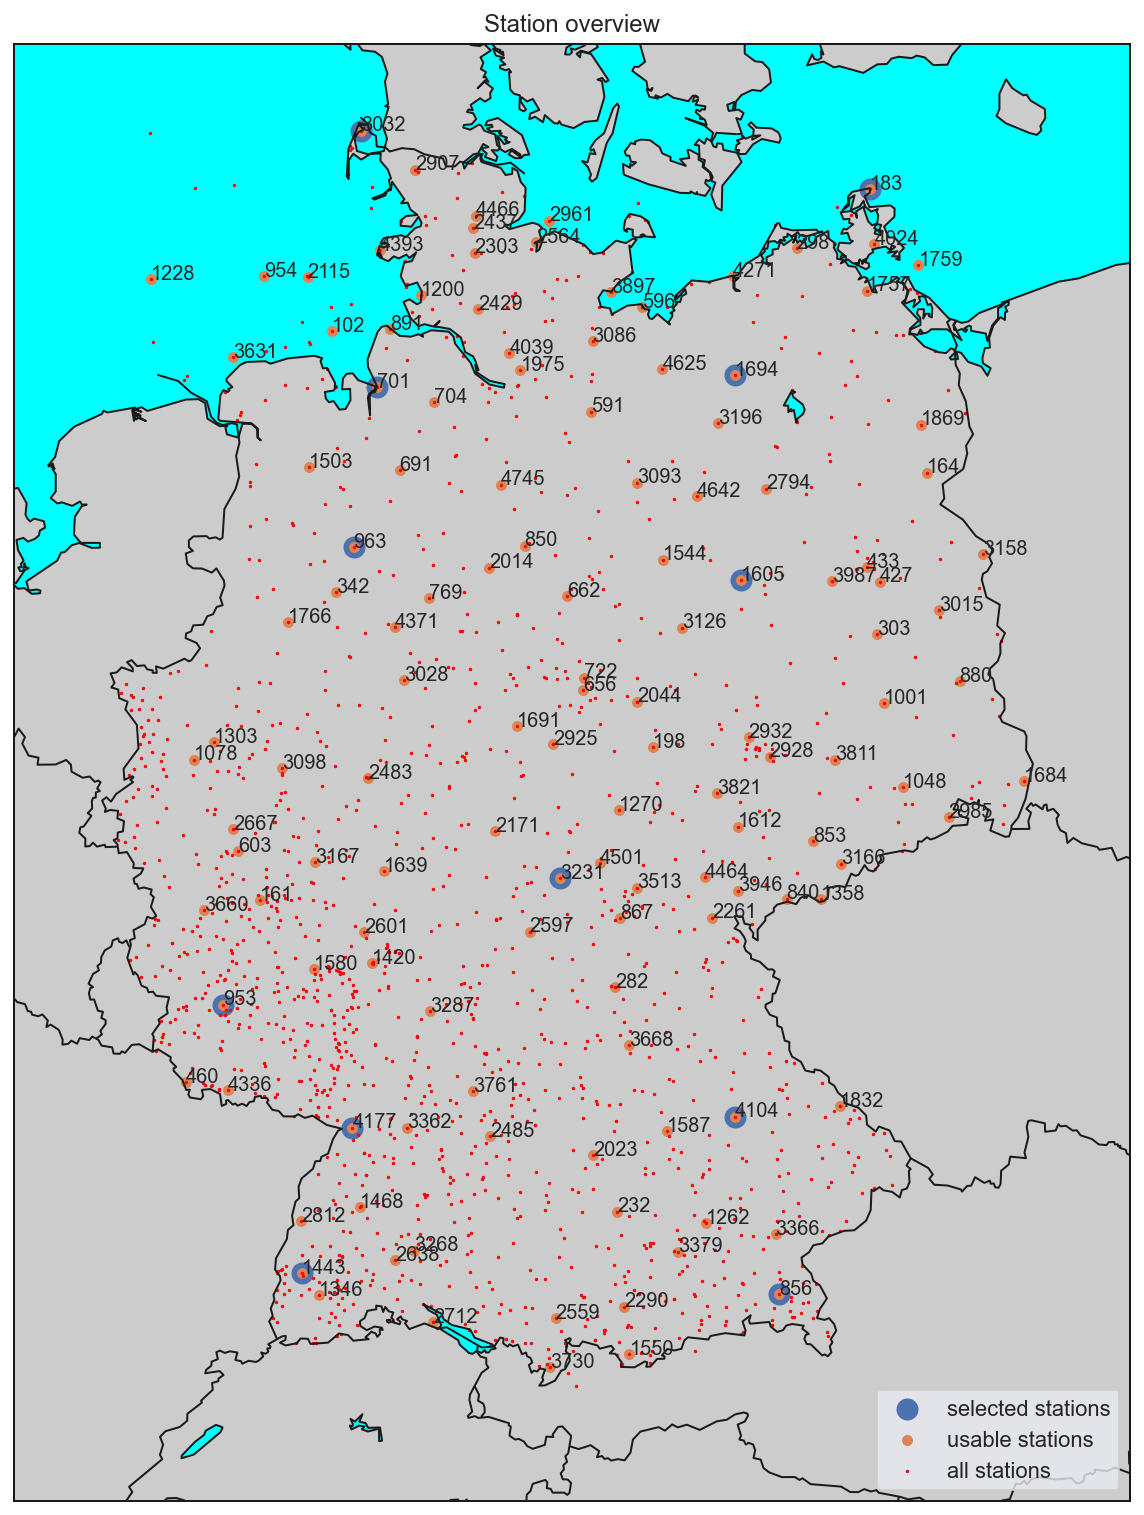

In [9]:
from cProfile import label
min_Breite = usable_stations.geoBreite.min()
max_Breite = usable_stations.geoBreite.max()
min_Laenge = usable_stations.geoLaenge.min()
max_Laenge = usable_stations.geoLaenge.max()
BBox = [min_Laenge, max_Laenge, min_Breite, max_Breite]

lons_all = all_stations.geoLaenge.tolist()
lats_all = all_stations.geoBreite.tolist()
lons_u = usable_stations.geoLaenge.tolist()
lats_u = usable_stations.geoBreite.tolist()
lons_s = selected_stations.geoLaenge.tolist()
lats_s = selected_stations.geoBreite.tolist()


fig = plt.gcf()
fig.set_size_inches(10, 15)

m = Basemap(projection='merc', \
            # llcrnrlat=BBox[2], urcrnrlat=BBox[3], \
            # llcrnrlon=BBox[0], urcrnrlon=BBox[1], \
            llcrnrlat=46.5, urcrnrlat=55.5, \
            llcrnrlon=5, urcrnrlon=16, \
            lat_ts=(min_Breite + max_Breite)/2, \
            resolution='i')
m.drawcoastlines()
m.fillcontinents(lake_color='aqua')
m.shadedrelief()
# draw parallels and meridians.
# m.drawparallels(range(46, 56, 2))
# m.drawmeridians(range(5, 15, 2))
m.drawmapboundary(fill_color='aqua')
m.drawcountries(linewidth=1)
print("midpoint: ", (BBox[0]+BBox[1])/2, (BBox[2]+BBox[3])/2)
x1, y1 =m((BBox[0]+BBox[1])/2, (BBox[2]+BBox[3])/2)

x_all, y_all =m(lons_all, lats_all)
x_u, y_u =m(lons_u, lats_u)
x_s, y_s =m(lons_s, lats_s)
# plt.scatter(x1, y1)

scatter_s = plt.scatter(x_s, y_s, s=100, label="selected stations")
scatter_u = plt.scatter(x_u, y_u, s=20, label="usable stations")
scatter_a = plt.scatter(x_all, y_all, color="red", s=.5, label="all stations")

for i, id in enumerate(id_list):
    plt.annotate(id, (x_u[i], y_u[i] + 0.2))

plt.legend(handles=[scatter_s, scatter_u, scatter_a])
plt.title("Station overview")
plt.show()

### Weather import setup

In [10]:
#setup:
from datetime import datetime
from wetterdienst.provider.dwd.observation import DwdObservationRequest, DwdObservationDataset, DwdObservationPeriod, DwdObservationResolution
# from wetterdienst import Wetterdienst, Resolution, Period, Parameter

from pprint import pprint
from wetterdienst import Settings
Settings.tidy = True
Settings.humanize =True
Settings.si_units = True
# API = Wetterdienst(provider="dwd", network="observation")

def dwd_request(params, start, end, station_ids):
    """Retrieve stations_result of DWD that measure temperature."""
    request = DwdObservationRequest(
        parameter=[params],
        resolution=DwdObservationResolution.HOURLY,
        start_date=start,
        end_date=end,
        period=DwdObservationPeriod.HISTORICAL,
    )
    
    stations = request.filter_by_station_id(station_ids)
    return stations

def get_weatherdata(date, parameter, start_date, end_date, station_ids):
    print("Receiving: ", parameter, " from stations: ", station_ids)
    station = dwd_request(parameter, start_date, end_date, station_ids)
    all_df = station.values.all().df
    df_list=[]
    for id in station_ids:
        df = all_df.query('station_id == @id').reset_index()
        df.rename(columns={"value":id}, inplace=True)
        df_list.append(df.loc[:,id])
        # total_df[id]=df.value
    total_df=pd.concat(df_list, axis=1)
    total_df.set_index(date, inplace=True)
    return total_df

### Importing weather data for selected stations

In [11]:
DwdObservationRequest.discover()

{'minute_1': {'precipitation_height': {'origin': 'mm', 'si': 'kg / m ** 2'},
  'precipitation_height_droplet': {'origin': 'mm', 'si': 'kg / m ** 2'},
  'precipitation_height_rocker': {'origin': 'mm', 'si': 'kg / m ** 2'},
  'precipitation_form': {'origin': '-', 'si': '-'}},
 'minute_5': {'precipitation_form': {'origin': '-', 'si': '-'},
  'precipitation_height': {'origin': 'mm', 'si': 'kg / m ** 2'},
  'precipitation_height_droplet': {'origin': 'mm', 'si': 'kg / m ** 2'},
  'precipitation_height_rocker': {'origin': 'mm', 'si': 'kg / m ** 2'}},
 'minute_10': {'pressure_air_site': {'origin': 'hPa', 'si': 'Pa'},
  'temperature_air_mean_200': {'origin': '°C', 'si': 'K'},
  'temperature_air_mean_005': {'origin': '°C', 'si': 'K'},
  'humidity': {'origin': 'pct', 'si': 'pct'},
  'temperature_dew_point_mean_200': {'origin': '°C', 'si': 'K'},
  'temperature_air_max_200': {'origin': '°C', 'si': 'K'},
  'temperature_air_max_005': {'origin': '°C', 'si': 'K'},
  'temperature_air_min_200': {'origin'

In [12]:
selected_stations=pd.read_pickle("../data/Stations_filtered_ids/selected_stations.pkl")
print(selected_stations.head())
selected_station_ids=selected_stations.Stations_id.tolist()
print(selected_station_ids)

   level_0  index  Stations_id  von_datum  bis_datum  Stationshoehe  \
0        3     21          183   19730101   20220909             42   
1       19     75          701   19490101   20220915              7   
2       26     87          856   19910101   20220915            551   
3       30     98          953   19550101   20220915            481   
4       32    100          963   19940103   20220915             38   

   geoBreite  geoLaenge Stationsname              Bundesland  
0    54.6791    13.4344       Arkona  Mecklenburg-Vorpommern  
1    53.5332     8.5761  Bremerhaven                  Bremen  
2    47.8843    12.5404     Chieming                  Bayern  
3    49.7619     7.0542   Deuselbach         Rheinland-Pfalz  
4    52.5881     8.3424     Diepholz           Niedersachsen  
[183, 701, 856, 953, 963, 1443, 1605, 1694, 3032, 3231, 4104, 4177]


In [13]:
print(parameters)

['wind_speed', 'sunshine_duration', 'pressure_air_site', 'temperature_air_mean_200', 'precipitation_height']


In [18]:
weather_path = "weather"

In [20]:
for parameter in parameters:
    write_path="../data/weather/raw/"+parameter+".pkl"
    print(write_path)
    df = get_weatherdata(date, parameter, start_date, end_date, station_ids)
    df.to_pickle(write_path)

../data/weather/raw/wind_speed.pkl
../data/weather/raw/sunshine_duration.pkl
../data/weather/raw/pressure_air_site.pkl
../data/weather/raw/temperature_air_mean_200.pkl
../data/weather/raw/precipitation_height.pkl


Clean up the received data (fill NaN values with either 0 or inerpolation between last and next received value)

### Clean Up and plotting of imported data

In [21]:
def clean_data(parameter, read_path, write_path):
    df = pd.read_pickle(read_path)
    if parameter not in ["sunshine_duration"]:
        df.interpolate(limit = 12, inplace=True) #replace up to half a day of NaN values with interpolation
        df.fillna(df.mean(), inplace=True) # fill all other NaN values with mean value of the respective column
    else:
        df.fillna(0,inplace=True)
    df.to_pickle(write_path)


In [22]:
for parameter in parameters:
    read_path=f"../data/{weather_path}/raw/"+parameter+".pkl"
    write_path=f"../data/{weather_path}/cleaned/"+parameter+".pkl"
    clean_data(parameter, read_path, write_path)

Plot one month of recorded data for all selected stations

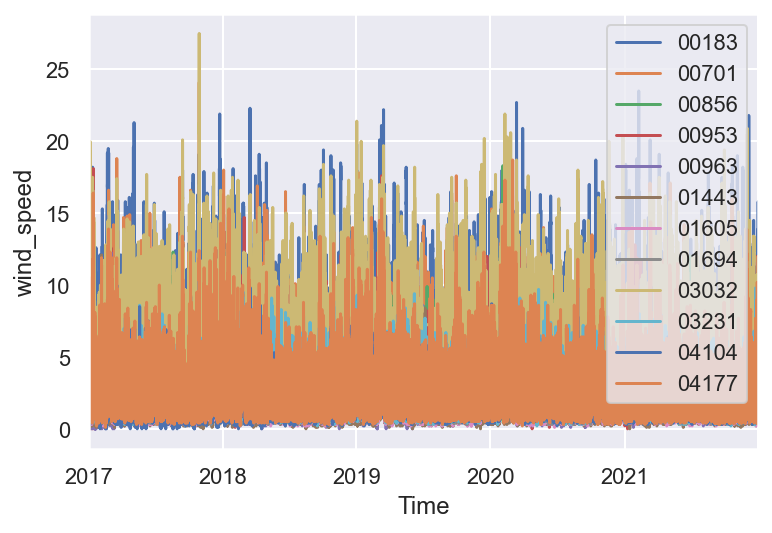

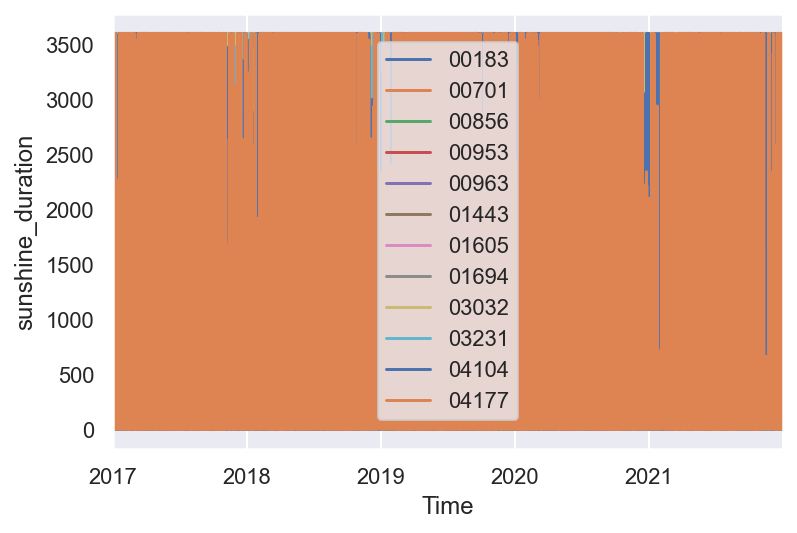

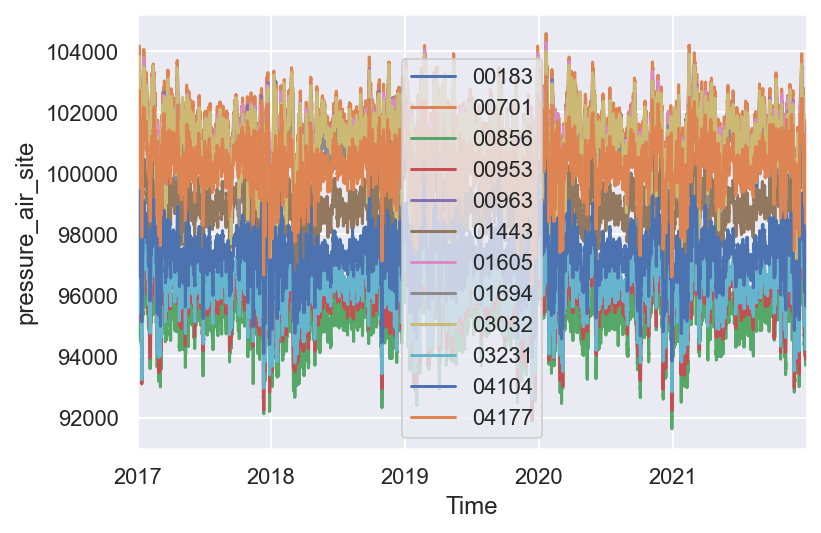

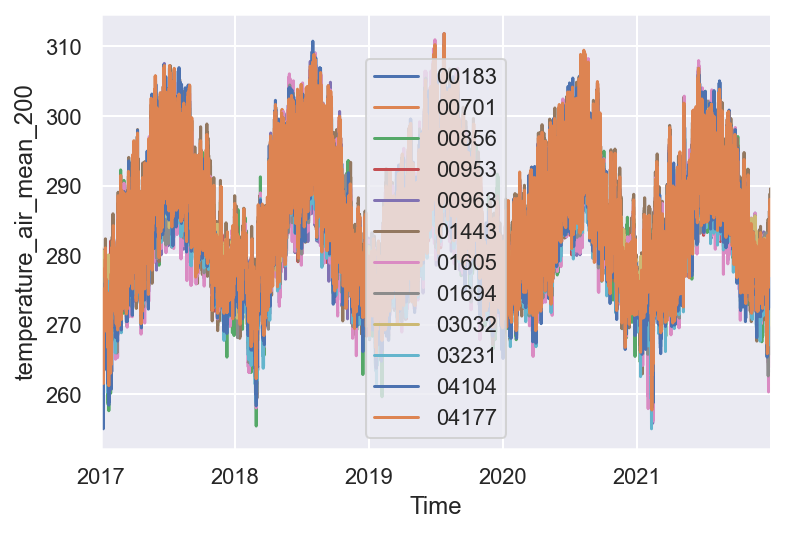

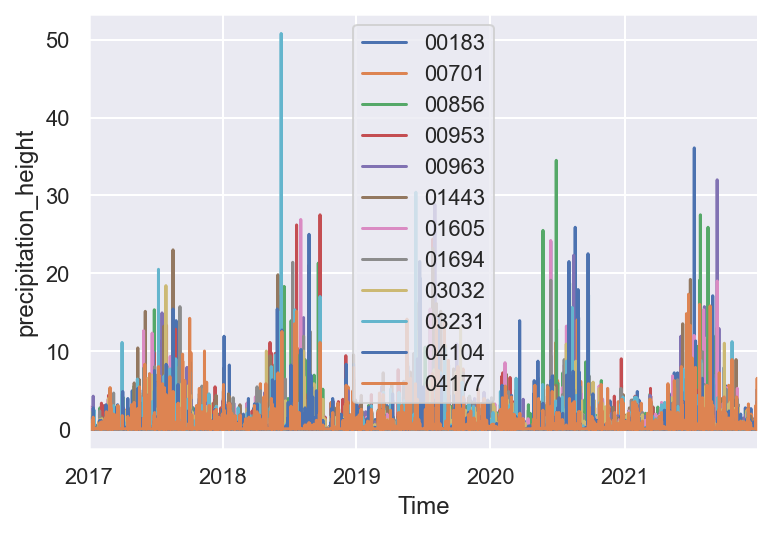

In [23]:

for parameter in parameters:
    # print(parameter)
    path=f"../data/{weather_path}/cleaned/"+parameter+".pkl"
    new_df=pd.read_pickle(path)
    new_df.plot(xlabel="Time", ylabel=parameter)


### Import of weatherdata from all available stations

In [24]:
usable_station_ids=[str(i).zfill(5) for i in usable_stations.Stations_id.tolist()]
print(usable_station_ids)

['00102', '00161', '00164', '00183', '00198', '00232', '00282', '00298', '00303', '00342', '00427', '00433', '00460', '00591', '00596', '00603', '00656', '00662', '00691', '00701', '00704', '00722', '00769', '00840', '00850', '00853', '00856', '00867', '00880', '00891', '00953', '00954', '00963', '01001', '01048', '01078', '01200', '01228', '01262', '01270', '01303', '01346', '01358', '01420', '01443', '01468', '01503', '01544', '01550', '01580', '01587', '01605', '01612', '01639', '01684', '01691', '01694', '01757', '01759', '01766', '01832', '01869', '01975', '02014', '02023', '02044', '02115', '02171', '02261', '02290', '02303', '02429', '02437', '02483', '02485', '02559', '02564', '02597', '02601', '02638', '02667', '02712', '02794', '02812', '02907', '02925', '02928', '02932', '02961', '02985', '03015', '03028', '03032', '03086', '03093', '03098', '03126', '03158', '03166', '03167', '03196', '03231', '03268', '03287', '03362', '03366', '03379', '03513', '03631', '03660', '03668', 

Import weatherdata for all available stations (Takes very long, ca. 11 min per parameter!!)

In [25]:
weather_path = "weather_all_stations"

In [26]:
parameters

['wind_speed',
 'sunshine_duration',
 'pressure_air_site',
 'temperature_air_mean_200',
 'precipitation_height']

In [27]:
for parameter in parameters:
    write_path=f"../data/{weather_path}/raw/"+parameter+".pkl"
    print(write_path)
    df = get_weatherdata(date, parameter, start_date, end_date, usable_station_ids)
    df.to_pickle(write_path)

../data/weather_all_stations/raw/wind_speed.pkl
../data/weather_all_stations/raw/sunshine_duration.pkl
../data/weather_all_stations/raw/pressure_air_site.pkl
../data/weather_all_stations/raw/temperature_air_mean_200.pkl
../data/weather_all_stations/raw/precipitation_height.pkl


In [28]:
for parameter in parameters:
    read_path=f"../data/{weather_path}/raw/{parameter}.pkl"
    write_path=f"../data/{weather_path}/cleaned/{parameter}.pkl"
    clean_data(parameter, read_path, write_path)

## Preview of data normalization
We can't do this in this notebook yet, since all the data should be normalized over the training set and not the whole set (so the network doen't get an implicit preview of test values during training).

In [29]:
# Import data
wx_params = {
    "temperature_air_mean_200": "temp",
    "wind_speed": "wind",
    "pressure_air_site": "press",
    # "precipitation_height": "precip",
    "sunshine_duration": "sun"
}

# Concatenate all weather parameters into one data frame
wx_dict = {}
for name, handle in wx_params.items():
    wx_dict[handle]=(pd.read_pickle("../data/weather_all_stations/cleaned/"+name+".pkl"))

df = pd.concat(wx_dict.values(), axis=1, ignore_index=False, verify_integrity=True, keys=wx_dict.keys())

df.head()

temp                                          \
                            00102   00161   00164   00183   00198   00232   
2017-01-01 00:00:00+00:00  278.35  268.75  276.65  277.45  270.65  269.45   
2017-01-01 01:00:00+00:00  278.25  268.85  276.75  277.65  270.25  269.25   
2017-01-01 02:00:00+00:00  278.25  269.25  277.05  277.85  269.45  269.05   
2017-01-01 03:00:00+00:00  278.05  269.35  277.15  277.85  269.25  268.55   
2017-01-01 04:00:00+00:00  278.15  269.45  277.55  277.95  268.85  267.85   

                                                           ...   sun        \
                            00282   00298   00303   00342  ... 04271 04336   
2017-01-01 00:00:00+00:00  262.35  277.75  274.75  275.65  ...   0.0   0.0   
2017-01-01 01:00:00+00:00  262.75  277.75  274.65  275.15  ...   0.0   0.0   
2017-01-01 02:00:00+00:00  261.35  277.75  274.35  274.65  ...   0.0   0.0   
2017-01-01 03:00:00+00:00  261.15  277.95  274.55  274.25  ...   0.0   0.0   
2017-01-01 04:00:00+00:00  261.35  277.85  274.75  274.45  ...   0.0   0.0   

                                                                           
                          04371 04393 04464 04466 04501 04625 04642 04745  
2017-01-01 00:00:00+00:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2017-01-01 01:00:00+00:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2017-01-01 02:00:00+00:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2017-01-01 03:00:00+00:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2017-01-01 04:00:00+00:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 528 columns]

c:\Users\sengu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:980: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\sengu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
c:\Users\sengu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1005: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\sengu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:464: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
c:\Users\sengu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:465: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X,

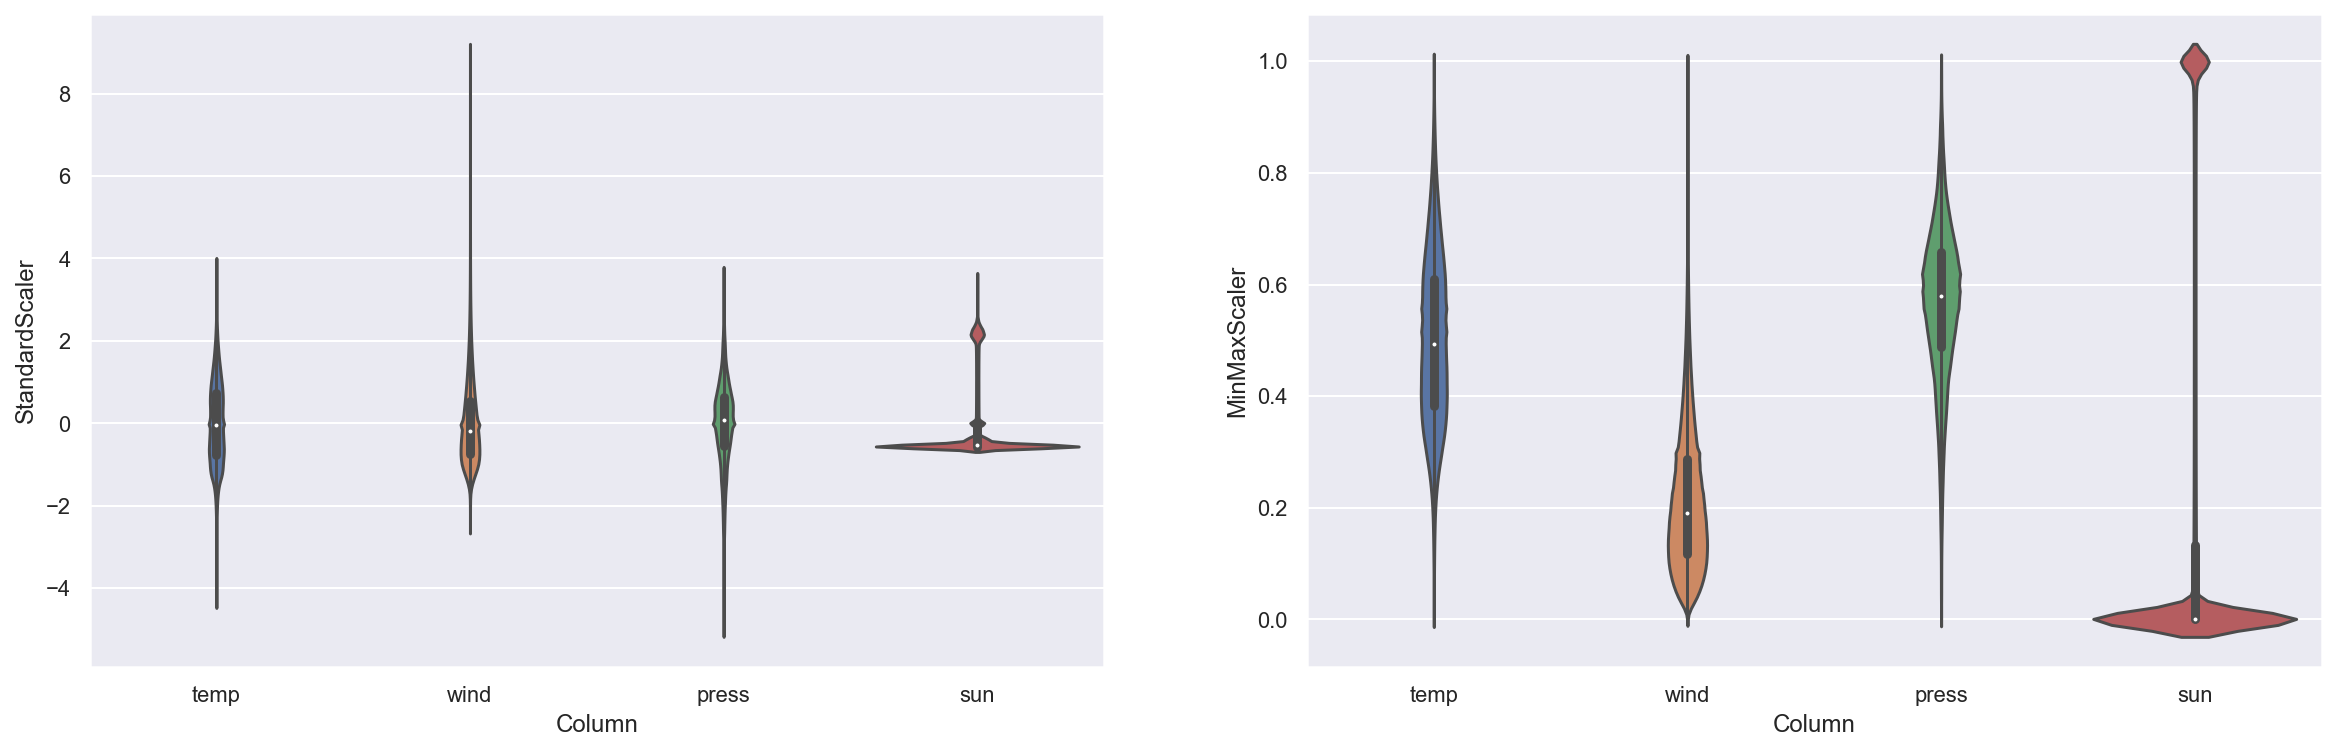

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Standardize dataframe
df_std = pd.DataFrame(StandardScaler().fit_transform(df),
                      columns=df.columns, index=df.index)
# Rescale / min-max normalize dataframe
df_scl = pd.DataFrame(MinMaxScaler().fit_transform(df),
                      columns=df.columns, index=df.index)

# plot normalizations
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=True)
sns.violinplot(ax=axes[0], x='Column', y='StandardScaler',
               data=df_std.melt(var_name='Column', value_name='StandardScaler'))
_ = sns.violinplot(ax=axes[1], x='Column', y='MinMaxScaler',
                   data=df_scl.melt(var_name='Column', value_name='MinMaxScaler'))


c:\Users\sengu\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1096: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
c:\Users\sengu\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
c:\Users\sengu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:3246: RuntimeWarning: Degrees of freedom <= 0 for slice
  x_trans_var = x_trans.var()
c:\Users\sengu\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\sengu\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:246: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
c:\Users\sen

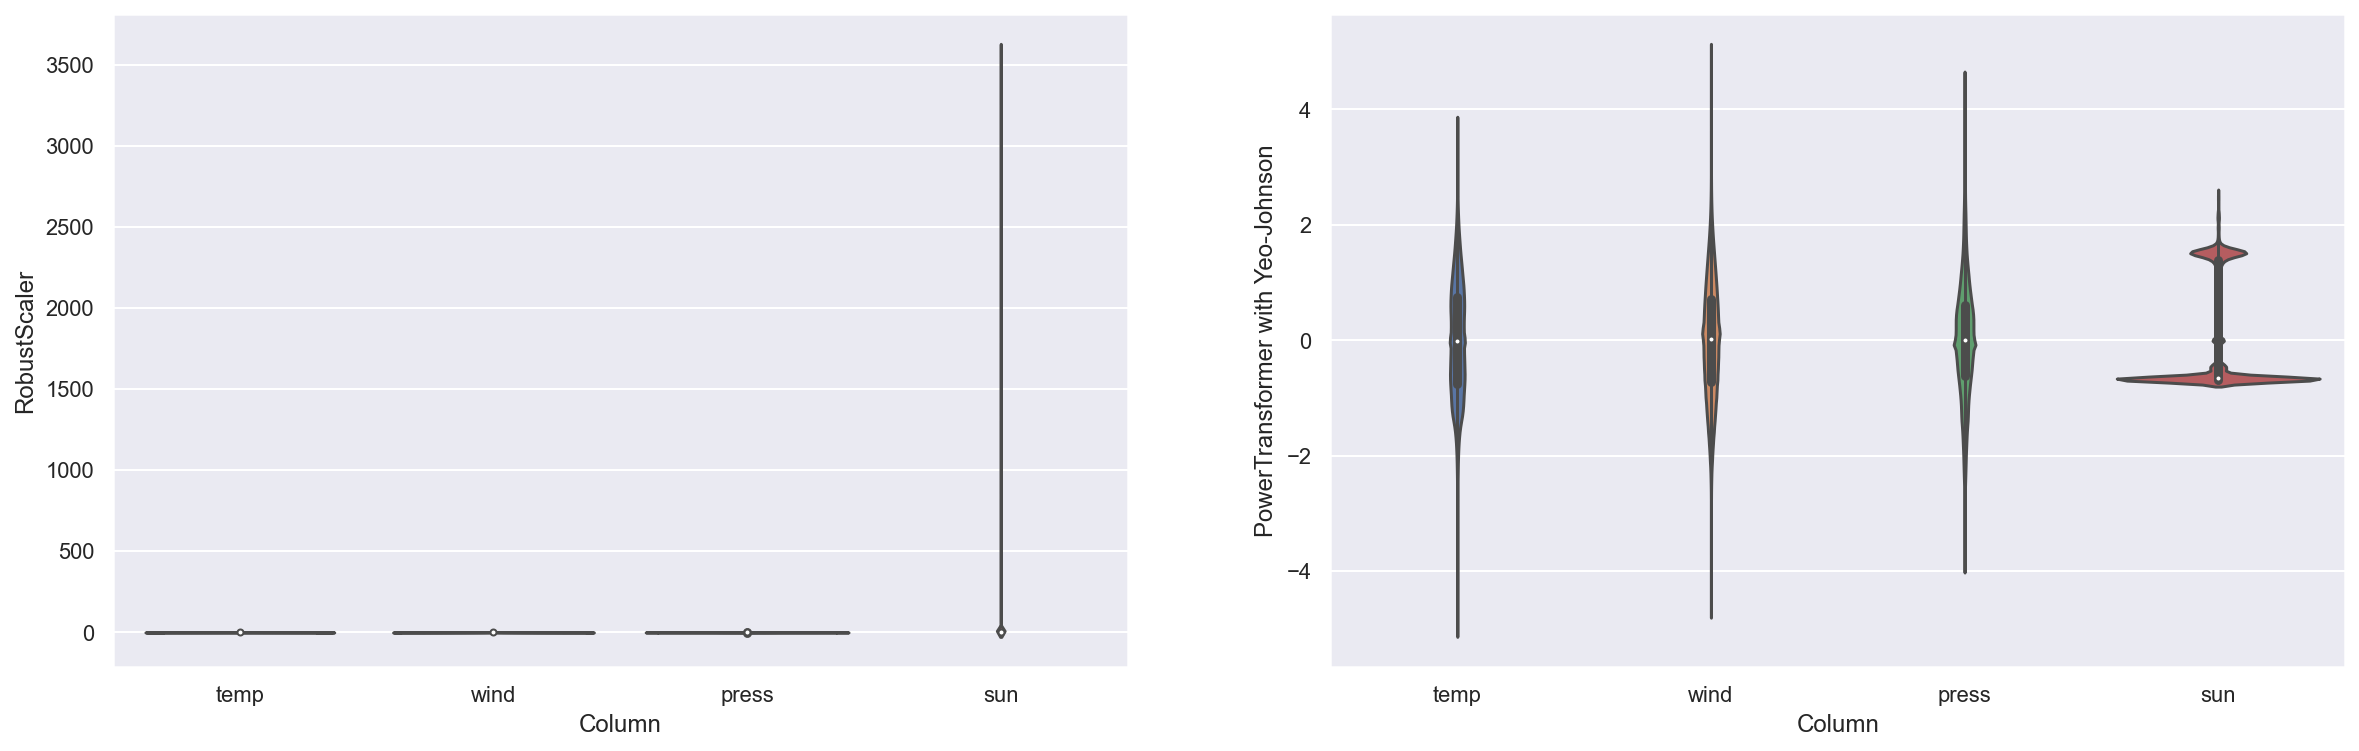

In [31]:
from sklearn.preprocessing import RobustScaler, PowerTransformer

# Scale with the RobustScaler
df_rob = pd.DataFrame(RobustScaler().fit_transform(df),
                      columns=df.columns, index=df.index)
# Transform to Gaussian Distribution with Yeo-Johnson
df_tyj = pd.DataFrame(PowerTransformer(method="yeo-johnson").fit_transform(df),
                      columns=df.columns, index=df.index)

# plot normalizations
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=True)
sns.violinplot(ax=axes[0], x='Column', y='RobustScaler',
               data=df_rob.melt(var_name='Column', value_name='RobustScaler'))
_ = sns.violinplot(ax=axes[1], x='Column', y='PowerTransformer with Yeo-Johnson',
                   data=df_tyj.melt(var_name='Column', value_name='PowerTransformer with Yeo-Johnson'))


## Plot weather

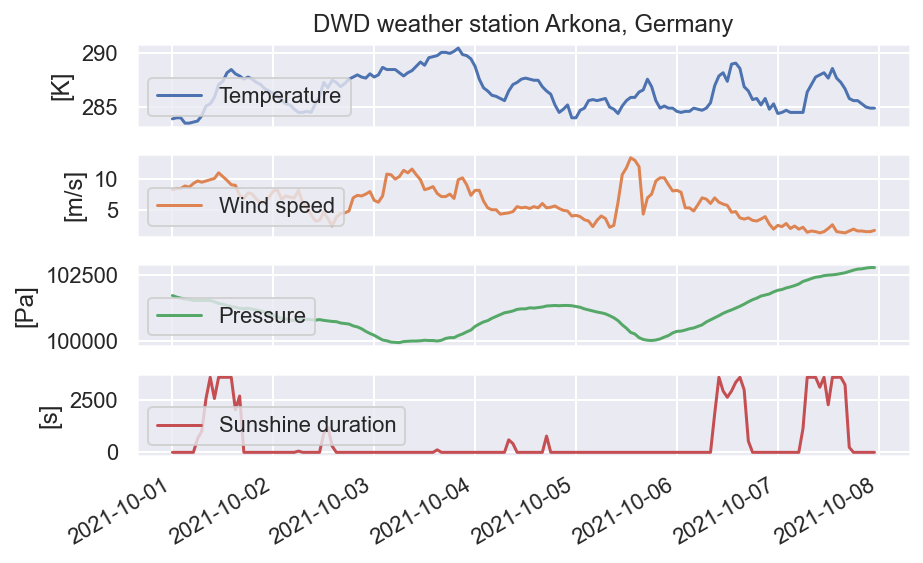

In [34]:
station = "00183"
wx_week = df.xs(station, level=1, axis=1).loc["2021-10-01":"2021-10-07"]

fig = plt.figure(figsize=(6.5, 4))
gs = fig.add_gridspec(4, hspace=0.1, wspace=0.1)
(ax1, ax2, ax3, ax4) = gs.subplots()


ax1.plot(wx_week["temp"], color="C0", label="Temperature")
ax2.plot(wx_week["wind"], color="C1", label="Wind speed")
ax3.plot(wx_week["press"], color="C2", label="Pressure")
ax4.plot(wx_week["sun"], color="C3", label="Sunshine duration")
ax1.set_title("DWD weather station Arkona, Germany")
ax1.set_ylabel("[K]")
ax2.set_ylabel("[m/s]")
ax3.set_ylabel("[Pa]")
ax4.set_ylabel("[s]")

for ax in plt.gcf().axes:
    ax.legend(loc=3)

fig.autofmt_xdate()
gs.tight_layout(fig)

## Addition of noise to simulate forecast inaccuracy

Add Gaussian noise:

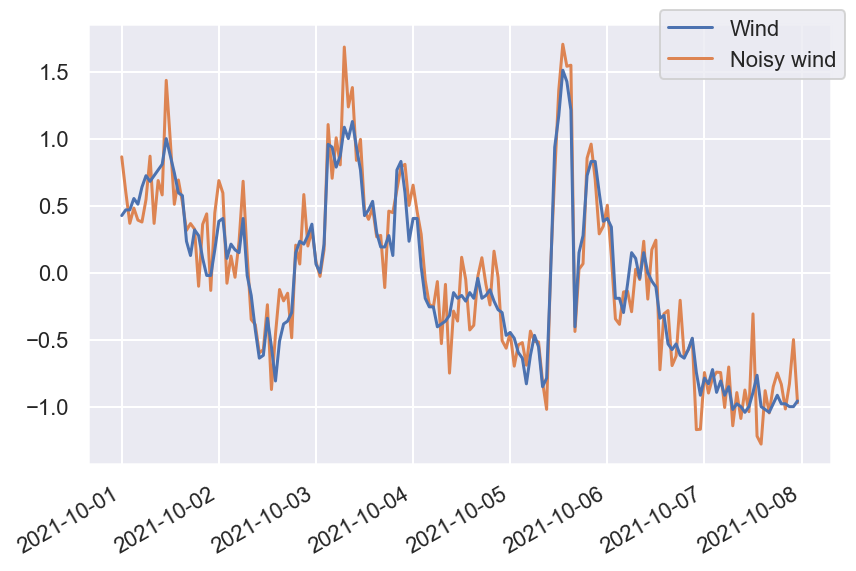

In [35]:
noise_factor = 0.2
wx_week = df_rob.xs(station, level=1, axis=1).loc["2021-10-01":"2021-10-07"]
wx_week_noisy = wx_week + noise_factor * np.random.normal(size=wx_week.shape)

# Plot wind as example
fig, ax = plt.subplots(figsize=(6, 4))
ax = plt.plot(wx_week["wind"], label="Wind")
ax = plt.plot(wx_week_noisy["wind"], label="Noisy wind", zorder=1)
fig.autofmt_xdate()
fig.legend()
fig.tight_layout()

Create a random walk time series:

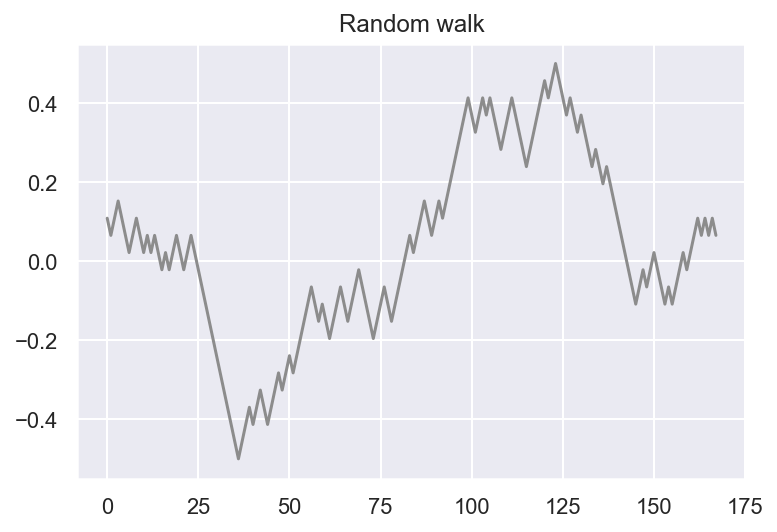

In [36]:
from random import seed
from random import random

seed(1)
random_walk = []
random_walk.append(0)
for i in range(1, wx_week.shape[0]):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
# Scale the data
random_walk = MinMaxScaler().fit_transform(
    np.array(random_walk).reshape(-1, 1)) - 0.5
plt.plot(random_walk, c="C7")
_ = plt.title("Random walk")


Apply random walk to wind time series:

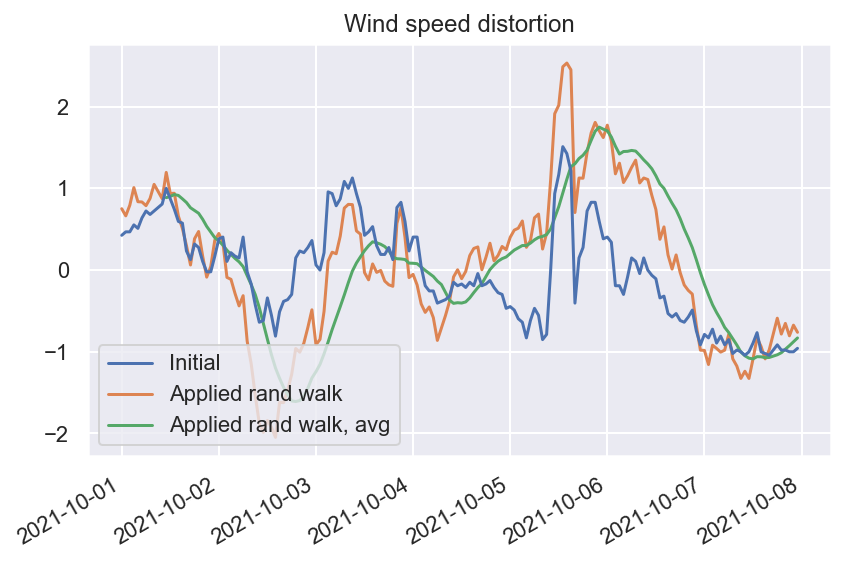

In [37]:
noise_factor = 3
wx_week_rw = wx_week + noise_factor * random_walk

fig, ax = plt.subplots(figsize=(6, 4))

ax = plt.plot(wx_week["wind"], label="Initial")
ax = plt.plot(wx_week_rw["wind"], label="Applied rand walk", zorder=1)
ax = plt.plot(wx_week_rw["wind"].rolling(12).mean(),
              label="Applied rand walk, avg", zorder=1)
ax = plt.legend(loc=3)
fig.autofmt_xdate()
plt.title("Wind speed distortion")

fig.tight_layout()
